In [1]:
import csv
import requests
from bs4 import BeautifulSoup


def scrape_data(url):

    response = requests.get(url, timeout=10)
    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find_all('table')[1]

    rows = table.select('tbody>tr')

   
    header = ['Districts','Confirmed','Deaths','Recovered','Readmitted']
   

    with open('records.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(header)
        for row in rows:
            data = [th.text.strip() for th in row.find_all('td')]
            writer.writerow(data)
            

            
if __name__=="__main__":
    url = "https://kathmandupost.com/covid19"
    scrape_data(url)

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime
from plotly.subplots import make_subplots

import folium
from folium import plugins

from scipy.interpolate import interp1d
import plotly.express as px

In [3]:
corona = pd.read_csv('records.csv')
# corona = corona.drop(['Longitude','Latitude'],axis=1)
corona

Districts  Confirmed  Deaths  Recovered  Readmitted
0           Rautahat       1520       2        750           0
1            Kailali       1138       4        530           0
2            Dailekh        942       1        805           0
3          Mahottari        842       0        344           0
4         Kapilvastu        808       1        747           0
5            Sarlahi        776       0        628           0
6               Doti        758       0        537           0
7             Achham        706       1        556           0
8               Dang        697       1        559           0
9            Dhanusa        689       3        580           0
10            Bajura        619       1        253           0
11             Parsa        592      11        176           0
12           Surkhet        581       2        551           0
13             Palpa        568       1        556           0
14        Kanchanpur        552       0        483           0
15           Saptari        471       1        353           0
16         Kathmandu        449       4        110           0
17             Banke        446       2        415           0
18             Gulmi        371       3        350           0
19             Jhapa        368       0        322           0
20         Rupandehi        351       1        311           0
21      Arghakhanchi        345       1        320           0
22  Nawalparasi East        343       0        301           0
23           Pyuthan        338       0        331           0
24            Morang        330       1        218           0
25           Baitadi        319       0        300           0
26        Dadeldhura        309       0        267           0
27           Syangja        284       2        192           0
28           Bajhang        277       1        107           0
29            Salyan        267       0        193           0
30            Siraha        257       0        192           0
31           Baglung        248       1        220           0
32           Bardiya        241       0        200           0
33              Bara        212       3        141           0
34           Tanahun        184       0        161           0
35           Dhading        150       0        125           0
36           Sunsari        147       0        118           0
37             Kaski        142       0        104           0
38  Nawalparasi West        129       0        125           0
39           Chitwan        127       2         81           0
40            Gorkha        127       1        100           0
41           Lamjung        118       0         93           0
42          Lalitpur        104       1         30           0
43            Parbat        100       0         92           0
44          Udayapur         95       0         82           0
45           Kalikot         73       0         54           0
46             Rolpa         73       0         51           0
47             Jumla         71       0         68           0
48    Sindhupalchowk         69       2         35           0
49             Illam         61       0         28           0
50         Bhaktapur         59       0         31           0
51            Myagdi         50       1         41           0
52         Makwanpur         45       0         21           0
53         Ramechhap         40       0         20           0
54          Darchula         39       0         13           0
55           Nuwakot         39       0         21           0
56        Rukum West         38       0         31           0
57          Jajarkot         27       0         12           0
58   Kavrepalanchowk         24       0         23           0
59       Okhaldhunga         23       0         19           0
60          Sindhuli         22       0         17           0
61          Dhankuta         16       0         15           0
62           Khotang         16       0   

In [4]:
corona['Active']=corona['Confirmed']-(corona['Recovered']+corona['Deaths'])
corona

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
0           Rautahat       1520       2        750           0     768
1            Kailali       1138       4        530           0     604
2            Dailekh        942       1        805           0     136
3          Mahottari        842       0        344           0     498
4         Kapilvastu        808       1        747           0      60
5            Sarlahi        776       0        628           0     148
6               Doti        758       0        537           0     221
7             Achham        706       1        556           0     149
8               Dang        697       1        559           0     137
9            Dhanusa        689       3        580           0     106
10            Bajura        619       1        253           0     365
11             Parsa        592      11        176           0     405
12           Surkhet        581       2        551           0      28
13             Palpa        568       1        556           0      11
14        Kanchanpur        552       0        483           0      69
15           Saptari        471       1        353           0     117
16         Kathmandu        449       4        110           0     335
17             Banke        446       2        415           0      29
18             Gulmi        371       3        350           0      18
19             Jhapa        368       0        322           0      46
20         Rupandehi        351       1        311           0      39
21      Arghakhanchi        345       1        320           0      24
22  Nawalparasi East        343       0        301           0      42
23           Pyuthan        338       0        331           0       7
24            Morang        330       1        218           0     111
25           Baitadi        319       0        300           0      19
26        Dadeldhura        309       0        267           0      42
27           Syangja        284       2        192           0      90
28           Bajhang        277       1        107           0     169
29            Salyan        267       0        193           0      74
30            Siraha        257       0        192           0      65
31           Baglung        248       1        220           0      27
32           Bardiya        241       0        200           0      41
33              Bara        212       3        141           0      68
34           Tanahun        184       0        161           0      23
35           Dhading        150       0        125           0      25
36           Sunsari        147       0        118           0      29
37             Kaski        142       0        104           0      38
38  Nawalparasi West        129       0        125           0       4
39           Chitwan        127       2         81           0      44
40            Gorkha        127       1        100           0      26
41           Lamjung        118       0         93           0      25
42          Lalitpur        104       1         30           0      73
43            Parbat        100       0         92           0       8
44          Udayapur         95       0         82           0      13
45           Kalikot         73       0         54           0      19
46             Rolpa         73       0         51           0      22
47             Jumla         71       0         68           0       3
48    Sindhupalchowk         69       2         35           0      32
49             Illam         61       0         28           0      33
50         Bhaktapur         59       0         31           0      28
51            Myagdi         50       1         41           0       8
52         Makwanpur         45       0         21           0      24
53         Ramechhap         40       0         20           0      20
54          Darchula         39       0         13           0      26
55           Nuwakot         39    

In [5]:
pyo.iplot([{
    'x' : corona.Districts,
    'y' : corona.Confirmed
}])

In [6]:
corona.loc[corona['Districts'] == 'Kathmandu']

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
16  Kathmandu        449       4        110           0     335

In [7]:
corona.loc[corona['Districts']=='Tanahun']

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
34   Tanahun        184       0        161           0      23

In [8]:
corona.loc[corona['Districts']=='Kaski']

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
37     Kaski        142       0        104           0      38

In [9]:
corona.loc[corona['Districts']=='Lalitpur']

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
42  Lalitpur        104       1         30           0      73

In [10]:
corona.loc[corona['Districts']=='Bhaktapur']

Districts  Confirmed  Deaths  Recovered  Readmitted  Active
50  Bhaktapur         59       0         31           0      28

In [11]:
current_status = {'Total confirmed':sum(corona['Confirmed']),
                  'Total Deaths':sum(corona['Deaths']),
                  'Total Recovered':sum(corona['Recovered']),
                  'Active Cases': sum(corona['Active']),
                  'Readmitted': sum(corona['Readmitted'])
    
                }

In [12]:
current_status

{'Total confirmed': 20332,
 'Total Deaths': 57,
 'Total Recovered': 14603,
 'Active Cases': 5672,
 'Readmitted': 0}

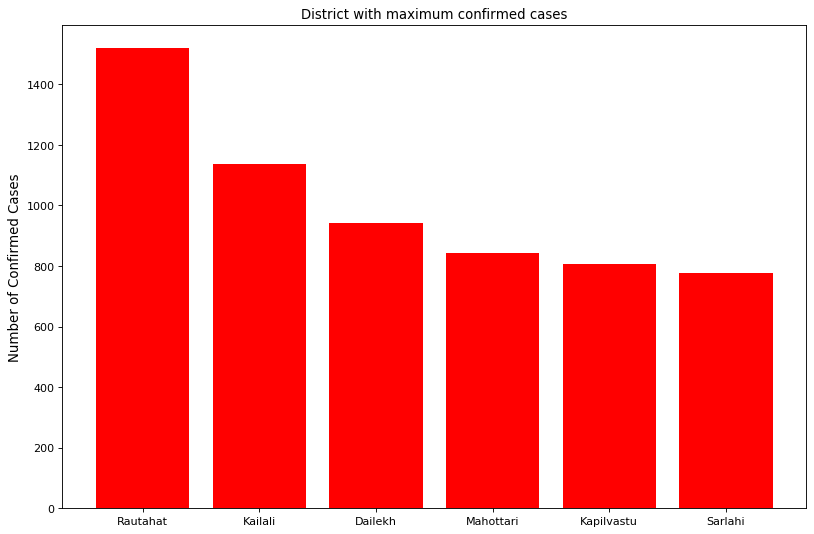

In [13]:
corona_latest = corona.sort_values(by=['Confirmed'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Confirmed'][:6], align='center', color='red')
plt.ylabel('Number of Confirmed Cases', size=12)
plt.title('District with maximum confirmed cases', size=12)
plt.show()

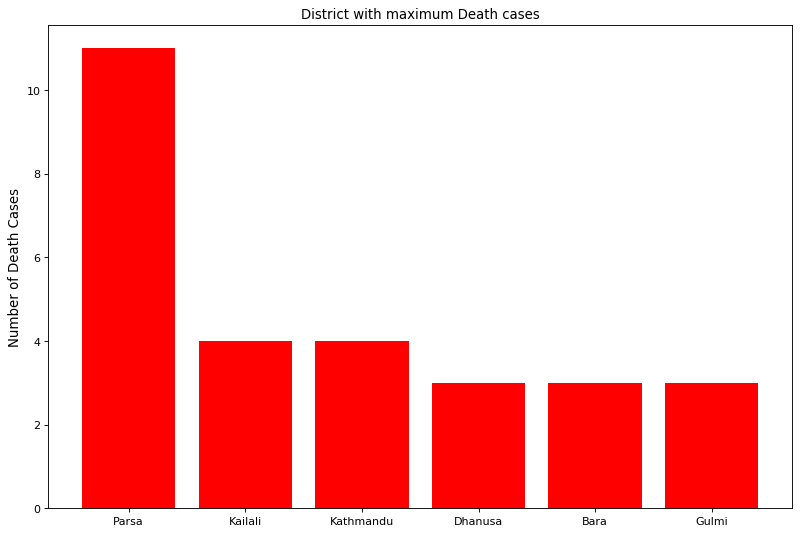

In [14]:
corona_latest = corona.sort_values(by=['Deaths'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Deaths'][:6], align='center', color='red')
plt.ylabel('Number of Death Cases', size=12)
plt.title('District with maximum Death cases', size=12)
plt.show()

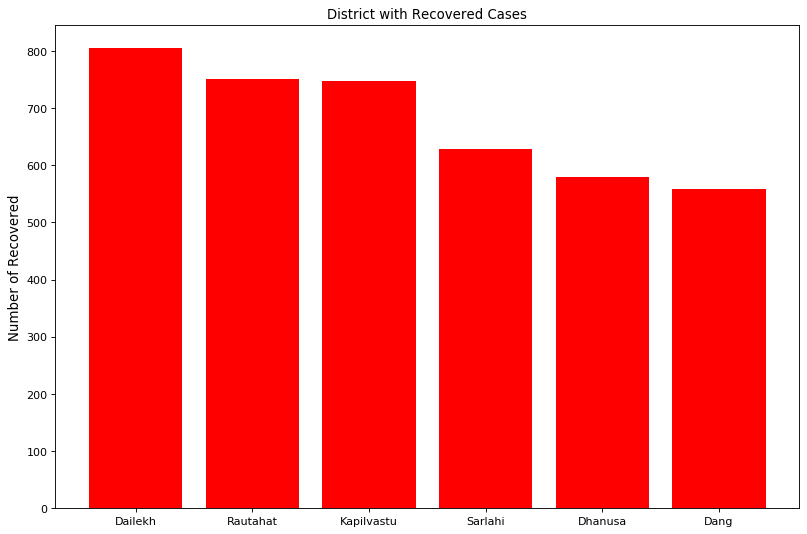

In [15]:
corona_latest = corona.sort_values(by=['Recovered'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Recovered'][:6], align='center', color='red')
plt.ylabel('Number of Recovered', size=12)
plt.title('District with Recovered Cases', size=12)
plt.show()

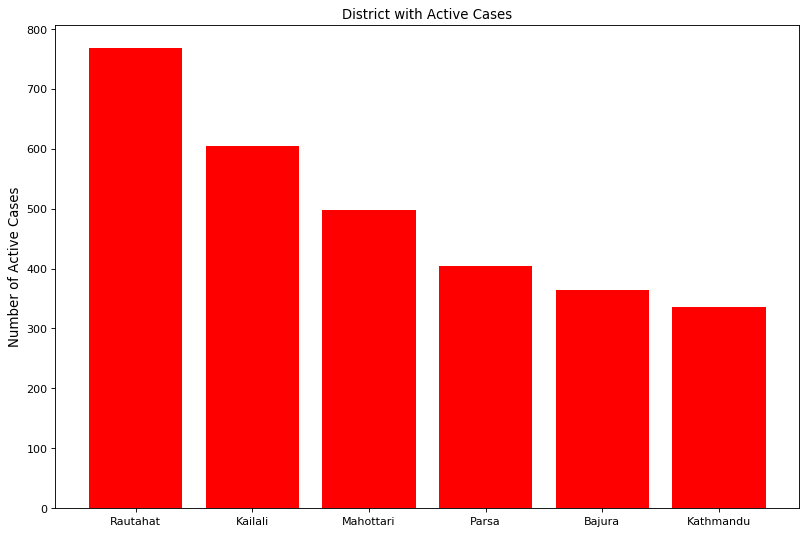

In [16]:
corona_latest = corona.sort_values(by=['Active'], ascending=False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(corona_latest['Districts'][:6], corona_latest['Active'][:6], align='center', color='red')
plt.ylabel('Number of Active Cases', size=12)
plt.title('District with Active Cases', size=12)
plt.show()

In [17]:
coordinate = pd.read_csv('Districts-Coordinate.csv')
coordinate

Districts  Longitude  Latitude
0           Achham    81.2519   29.0396
1     Arghakhanchi    83.0361   27.9829
2          Baglung    83.2201   28.3491
3          Baitadi    80.4688   29.5186
4          Bajhang    81.2519   29.7767
5           Bajura    81.6035   29.6155
6            Banke    81.7787   28.1461
7             Bara    85.0649   27.1341
8          Bardiya    81.4279   28.3102
9        Bhaktapur    85.4298   27.6710
10         Bhojpur    87.0524   27.1780
11         Chitwan    84.3542   27.5291
12      Dadeldhura    80.4994   29.2188
13         Dailekh    81.6473   28.9262
14            Dang    82.3018   27.9904
15        Darchula    80.7948   29.9038
16         Dhading    84.8985   27.9711
17        Dhankuta    87.3215   26.9835
18         Dhanusa    86.0122   26.8350
19         Dolakha    86.1752   27.7784
20           Dolpa    83.0791   29.0539
21            Doti    80.8987   29.2006
22          Gorkha    84.7925   28.2512
23           Gulmi    83.2934   28.0889
24           Humla    81.9535   30.0052
25            Ilam    87.9335   26.8760
26        Jajarkot    82.1558   28.8615
27           Jhapa    87.8942   26.6398
28           Jumla    82.1278   29.2788
29         Kailali    80.8092   28.7413
30         Kalikot    81.7349   29.2089
31      Kanchanpur    80.3213   28.8372
32      Kapilbastu    83.0469   27.5518
33           Kaski    84.0167   28.2622
34       Kathmandu    85.3240   27.7172
35  Kavrepalanchok    85.5612   27.5259
36         Khotang    86.8220   27.2317
37        Lalitpur    85.3225   27.6580
38         Lamjung    84.3542   28.2765
39       Mahottari    85.8077   26.8762
40       Makwanpur    85.0233   27.5546
41          Manang    84.2308   28.6918
42          Morang    87.4604   26.6799
43            Mugu    82.3466   29.6141
44         Mustang    83.8473   28.9985
45          Myagdi    83.3362   28.6029
46  Nawalparasi(E)    84.0331   27.6568
47  Nawalparasi(W)    83.6665   27.5328
48         Nuwakot    85.1661   27.9194
49     Okhaldhunga    86.5047   27.3240
50           Palpa    83.6348   27.8253
51       Panchthar    87.7781   27.1044
52          Parbat    83.6987   28.1780
53           Parsa    84.8568   27.1736
54         Pyuthan    82.8533   28.1017
55       Ramechhap    86.1345   27.3554
56          Rasuwa    85.3136   28.1727
57        Rautahat    85.3136   27.0487
58           Rolpa    82.6483   28.3816
59        Rukum(E)    82.8548   28.6641
60        Rukum(W)    82.4359   28.7436
61       Rupandehi    83.4463   27.5924
62          Salyan    82.1278   28.3525
63   Sankhuwasabha    87.1423   27.6142
64         Saptari    86.7014   26.6173
65         Sarlahi    85.5612   26.9627
66        Sindhuli    85.9713   27.2569
67   Sindhupalchok    85.6846   27.9512
68          Siraha    86.3525   26.7333
69      Solukhumbu    86.6611   27.7910
70         Sunsari    87.1822   26.6276
71         Surkhet    81.7787   28.5175
72         Syangja    83.8049   28.0197
73         Tanahun    84.2279   27.9447
74       Taplejung    87.7763   27.6257
75       Terhathum    87.5377   27.1508
76        Udayapur    86.7014   26.8998

In [18]:
corona.style.background_gradient(cmap='Reds')

In [19]:
COVID19= pd.merge(corona,coordinate,on="Districts")
COVID19

Districts  Confirmed  Deaths  Recovered  Readmitted  Active  \
0        Rautahat       1520       2        750           0     768   
1         Kailali       1138       4        530           0     604   
2         Dailekh        942       1        805           0     136   
3       Mahottari        842       0        344           0     498   
4         Sarlahi        776       0        628           0     148   
5            Doti        758       0        537           0     221   
6          Achham        706       1        556           0     149   
7            Dang        697       1        559           0     137   
8         Dhanusa        689       3        580           0     106   
9          Bajura        619       1        253           0     365   
10          Parsa        592      11        176           0     405   
11        Surkhet        581       2        551           0      28   
12          Palpa        568       1        556           0      11   
13     Kanchanpur        552       0        483           0      69   
14        Saptari        471       1        353           0     117   
15      Kathmandu        449       4        110           0     335   
16          Banke        446       2        415           0      29   
17          Gulmi        371       3        350           0      18   
18          Jhapa        368       0        322           0      46   
19      Rupandehi        351       1        311           0      39   
20   Arghakhanchi        345       1        320           0      24   
21        Pyuthan        338       0        331           0       7   
22         Morang        330       1        218           0     111   
23        Baitadi        319       0        300           0      19   
24     Dadeldhura        309       0        267           0      42   
25        Syangja        284       2        192           0      90   
26        Bajhang        277       1        107           0     169   
27         Salyan        267       0        193           0      74   
28         Siraha        257       0        192           0      65   
29        Baglung        248       1        220           0      27   
30        Bardiya        241       0        200           0      41   
31           Bara        212       3        141           0      68   
32        Tanahun        184       0        161           0      23   
33        Dhading        150       0        125           0      25   
34        Sunsari        147       0        118           0      29   
35          Kaski        142       0        104           0      38   
36        Chitwan        127       2         81           0      44   
37         Gorkha        127       1        100           0      26   
38        Lamjung        118       0         93           0      25   
39       Lalitpur        104       1         30           0      73   
40         Parbat        100       0         92           0       8   
41       Udayapur         95       0         82           0      13   
42        Kalikot         73       0         54           0      19   
43          Rolpa         73       0         51           0      22   
44          Jumla         71       0         68           0       3   
45      Bhaktapur         59       0         31           0      28   
46         Myagdi         50       1         41           0       8   
47      Makwanpur         45       0         21           0      24   
48      Ramechhap         40       0         20           0      20   
49       Darchula         39       0         13           0      26   
50        Nuwakot         39       0         21           0      18   
51       Jajarkot         27       0         12           0      15   
52    Okhaldhunga         23       0         19           0       4   
53       Sindhuli         22       0         17           0       5   
54       Dhankuta         16       0         15           0       1   
55        Khotang         16    

In [20]:
list1 = corona.Confirmed.tolist()

m=interp1d([0,max(list1)],[5,18])

circle_radius = m(list1)

typelist=['open-street-map','white-bg','carto-positron','stamen-terrain','stamen-toner','stamen-watercolor']

for i in typelist:
    print(i)
    fig=px.density_mapbox(COVID19, lat='Latitude', lon='Longitude',hover_name='Districts', radius=circle_radius, zoom=6,title='COVID-19 map of Nepal', mapbox_style=i)
    fig.show()

open-street-map


white-bg


carto-positron


stamen-terrain


stamen-toner


stamen-watercolor


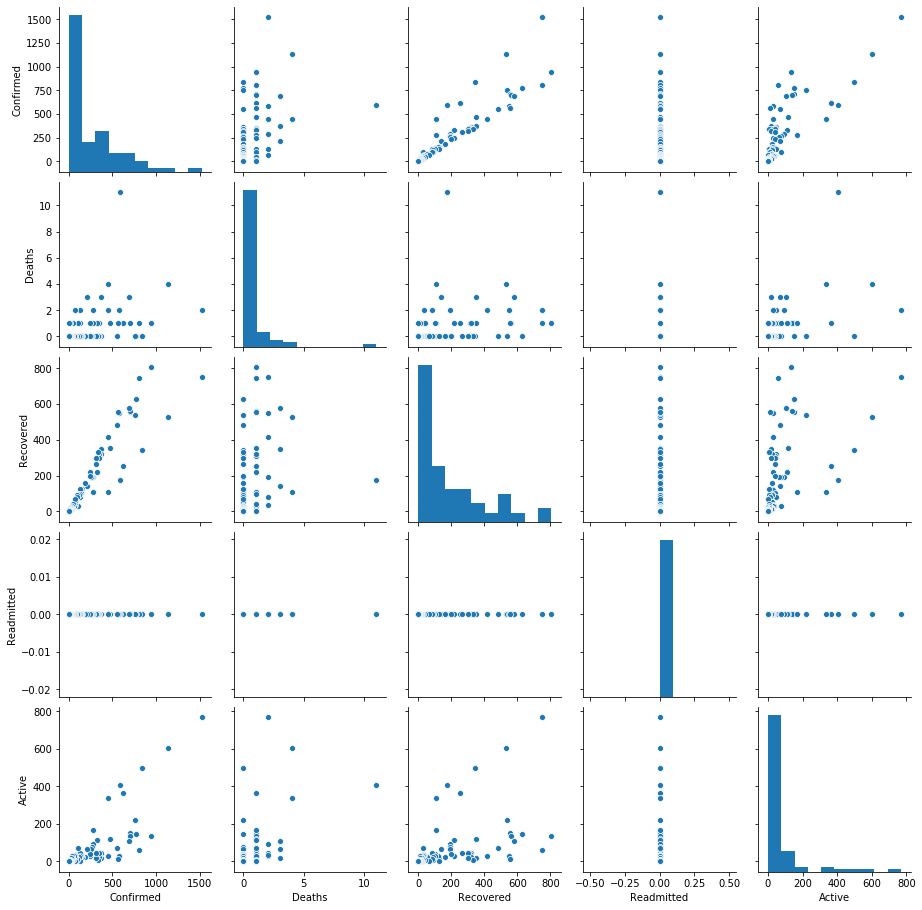

In [21]:
sns.pairplot(corona)

D:\installed-apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



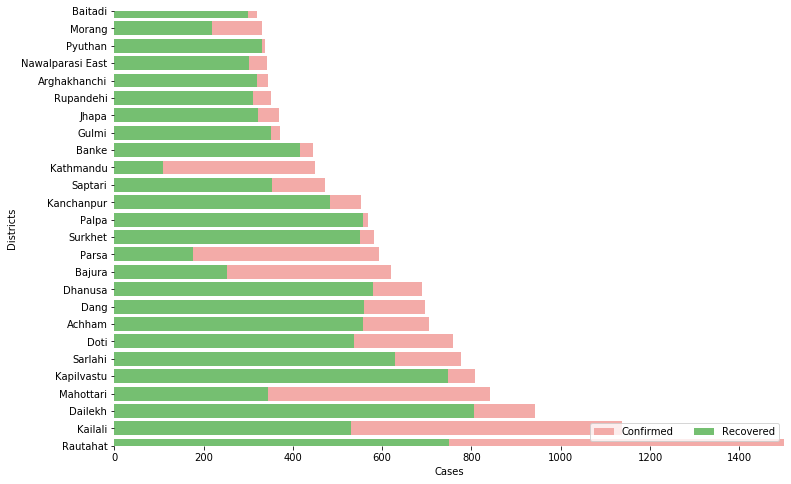

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
data = corona[['Districts','Confirmed','Recovered','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Districts", data=corona,label="Confirmed", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Districts", data=corona, label="Recovered", color="g")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1500),ylim=(0,25), ylabel="Districts",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [23]:
fig = go.Figure(data=[go.Bar(
            x=corona['Districts'][0:10], y=corona['Confirmed'][0:10],
            text=corona['Confirmed'][0:10],
            textposition='auto',
            marker_color='blue',
            

        )])
fig.update_layout(
    title='Ten most infected Districts of Nepal',
    xaxis_title="Districts",
    yaxis_title="Confirmed Cases",
        template='plotly_dark'

)
fig.show()

In [24]:
Readmitted_per_district = corona.groupby(["Districts"])["Readmitted"].sum().reset_index().sort_values("Readmitted",ascending=False).reset_index(drop=True)

In [25]:
fig = go.Figure(data=[go.Bar(
            x=Readmitted_per_district['Districts'][0:6], y=Readmitted_per_district['Readmitted'][0:6],
            text=Readmitted_per_district['Readmitted'][0:6],
            textposition='auto',
            marker_color='darkviolet'

        )])
fig.update_layout(
    title='10 Most Readmitted districts',
    xaxis_title="Districts",
    yaxis_title="Readmitted",
        template='plotly_dark'

)
fig.show()

In [26]:
fig = go.Figure(data=[go.Scatter(
    x=corona['Districts'][0:10],
    y=corona['Confirmed'][0:10],
    mode='markers',
    
    marker=dict(
        color=100+np.random.randn(500),
        size=(corona['Confirmed'][0:10]/10),
        showscale=True
        )
)])

fig.update_layout(
    title='10 Most infected Districts of Nepal',
    xaxis_title="Districts",
    yaxis_title="Confirmed Cases",
    template='plotly_dark'
)
fig.show()

In [27]:
Recovered_per_districts = corona.groupby(["Districts"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)

In [28]:
fig = go.Figure(data=[go.Bar(
            x=Recovered_per_districts['Districts'][0:10], y=Recovered_per_districts['Recovered'][0:10],
            text=Recovered_per_districts['Recovered'][0:10],
            textposition='auto',
            marker_color='red',

        )])
fig.update_layout(
    title='10 Most Recovered Districts',
    xaxis_title="Districts",
    yaxis_title="Recovered Cases",
    template='plotly_dark'
)
fig.show()

In [29]:
Active_per_district= corona.groupby(["Districts"])["Active"].sum().reset_index().sort_values("Active",ascending=False).reset_index(drop=True)

In [30]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Districts</b>','<b>Active Cases</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      Active_per_district['Districts'],
      Active_per_district['Active'],
      ],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*len(corona)],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.update_layout(
    title='Active Cases In Each Districts',
    template='plotly_dark'
)
fig.show()

In [31]:
fig = go.Figure(data=[go.Bar(
            x=Active_per_district['Districts'][0:10], y=Active_per_district['Active'][0:10],
            text=Active_per_district['Active'][0:10],
            marker_color='yellow',
           
        )])
fig.update_layout(
    title='10 Most Active Cases Districts',
    xaxis_title="Districts",
    yaxis_title="Active Cases",
    template='plotly_dark'
)
fig.show()

In [32]:
Deaths_per_district = corona.groupby(["Districts"])["Deaths"].sum().reset_index().sort_values("Deaths",ascending=False).reset_index(drop=True)

In [33]:
fig = go.Figure(data=[go.Bar(
            x=Deaths_per_district['Districts'][0:10], y=Deaths_per_district['Deaths'][0:10],
            text=Deaths_per_district['Deaths'][0:10],
            textposition='auto',
            marker_color='darkviolet'

        )])
fig.update_layout(
    title='10 Most death districts',
    xaxis_title="Districts",
    yaxis_title="Deaths",
        template='plotly_dark'

)
fig.show()

In [34]:
fig = px.pie(corona, values=corona['Confirmed'], 
             names=corona['Districts'],
             title='Conformed cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_dark'
)
fig.show()

In [35]:
Recovered_per_districts = corona.groupby(["Districts"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)

In [36]:
fig = px.pie(Recovered_per_districts, values=Recovered_per_districts['Recovered'], 
             names=Recovered_per_districts['Districts'],
             title='Recovered cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    template='plotly_dark'
)
fig.show()

#Time series analyis

In [37]:
import io

url="https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv"
s=requests.get(url).content
time_series_data = pd.read_csv(io.StringIO(s.decode('utf-8')))
time_series_data.head()

Date Country/Region Province/State       Lat       Long  Confirmed  \
0  2020-01-22    Afghanistan            NaN  33.93911  67.709953        0.0   
1  2020-01-23    Afghanistan            NaN  33.93911  67.709953        0.0   
2  2020-01-24    Afghanistan            NaN  33.93911  67.709953        0.0   
3  2020-01-25    Afghanistan            NaN  33.93911  67.709953        0.0   
4  2020-01-26    Afghanistan            NaN  33.93911  67.709953        0.0   

   Recovered  Deaths  
0        0.0     0.0  
1        0.0     0.0  
2        0.0     0.0  
3        0.0     0.0  
4        0.0     0.0

In [38]:
Data_Nepal = time_series_data[(time_series_data['Country/Region'] == 'Nepal') ].reset_index(drop=True)
Data_Nepal.tail()

Date Country/Region Province/State      Lat   Long  Confirmed  \
189  2020-07-29          Nepal            NaN  28.1667  84.25    19273.0   
190  2020-07-30          Nepal            NaN  28.1667  84.25    19547.0   
191  2020-07-31          Nepal            NaN  28.1667  84.25    19771.0   
192  2020-08-01          Nepal            NaN  28.1667  84.25    20086.0   
193  2020-08-02          Nepal            NaN  28.1667  84.25    20332.0   

     Recovered  Deaths  
189    14021.0    49.0  
190    14248.0    52.0  
191    14399.0    56.0  
192    14492.0    56.0  
193    14603.0    57.0

In [39]:
Data_Nepal['Active'] = Data_Nepal['Confirmed']-(Data_Nepal['Recovered'] + Data_Nepal['Deaths'])

In [40]:
No_NAN = Data_Nepal.drop(columns=['Province/State'])
No_NAN

Date Country/Region      Lat   Long  Confirmed  Recovered  Deaths  \
0    2020-01-22          Nepal  28.1667  84.25        0.0        0.0     0.0   
1    2020-01-23          Nepal  28.1667  84.25        0.0        0.0     0.0   
2    2020-01-24          Nepal  28.1667  84.25        0.0        0.0     0.0   
3    2020-01-25          Nepal  28.1667  84.25        1.0        0.0     0.0   
4    2020-01-26          Nepal  28.1667  84.25        1.0        0.0     0.0   
5    2020-01-27          Nepal  28.1667  84.25        1.0        0.0     0.0   
6    2020-01-28          Nepal  28.1667  84.25        1.0        0.0     0.0   
7    2020-01-29          Nepal  28.1667  84.25        1.0        0.0     0.0   
8    2020-01-30          Nepal  28.1667  84.25        1.0        0.0     0.0   
9    2020-01-31          Nepal  28.1667  84.25        1.0        0.0     0.0   
10   2020-02-01          Nepal  28.1667  84.25        1.0        0.0     0.0   
11   2020-02-02          Nepal  28.1667  84.25        1.0        0.0     0.0   
12   2020-02-03          Nepal  28.1667  84.25        1.0        0.0     0.0   
13   2020-02-04          Nepal  28.1667  84.25        1.0        0.0     0.0   
14   2020-02-05          Nepal  28.1667  84.25        1.0        0.0     0.0   
15   2020-02-06          Nepal  28.1667  84.25        1.0        0.0     0.0   
16   2020-02-07          Nepal  28.1667  84.25        1.0        0.0     0.0   
17   2020-02-08          Nepal  28.1667  84.25        1.0        0.0     0.0   
18   2020-02-09          Nepal  28.1667  84.25        1.0        0.0     0.0   
19   2020-02-10          Nepal  28.1667  84.25        1.0        0.0     0.0   
20   2020-02-11          Nepal  28.1667  84.25        1.0        0.0     0.0   
21   2020-02-12          Nepal  28.1667  84.25        1.0        1.0     0.0   
22   2020-02-13          Nepal  28.1667  84.25        1.0        1.0     0.0   
23   2020-02-14          Nepal  28.1667  84.25        1.0        1.0     0.0   
24   2020-02-15          Nepal  28.1667  84.25        1.0        1.0     0.0   
25   2020-02-16          Nepal  28.1667  84.25        1.0        1.0     0.0   
26   2020-02-17          Nepal  28.1667  84.25        1.0        1.0     0.0   
27   2020-02-18          Nepal  28.1667  84.25        1.0        1.0     0.0   
28   2020-02-19          Nepal  28.1667  84.25        1.0        1.0     0.0   
29   2020-02-20          Nepal  28.1667  84.25        1.0        1.0     0.0   
30   2020-02-21          Nepal  28.1667  84.25        1.0        1.0     0.0   
31   2020-02-22          Nepal  28.1667  84.25        1.0        1.0     0.0   
32   2020-02-23          Nepal  28.1667  84.25        1.0        1.0     0.0   
33   2020-02-24          Nepal  28.1667  84.25        1.0        1.0     0.0   
34   2020-02-25          Nepal  28.1667  84.25        1.0        1.0     0.0   
35   2020-02-26          Nepal  28.1667  84.25        1.0        1.0     0.0   
36   2020-02-27          Nepal  28.1667  84.25        1.0        1.0     0.0   
37   2020-02-28          Nepal  28.1667  84.25        1.0        1.0     0.0   
38   2020-02-29          Nepal  28.1667  84.25        1.0        1.0     0.0   
39   2020-03-01          Nepal  28.1667  84.25        1.0        1.0     0.0   
40   2020-03-02          Nepal  28.1667  84.25        1.0        1.0     0.0   
41   2020-03-03          Nepal  28.1667  84.25        1.0        1.0     0.0   
42   2020-03-04          Nepal  28.1667  84.25        1.0        1.0     0.0   
43   2020-03-05          Nepal  28.1667  84.25        1.0        1.0     0.0   
44   2020-03-06          Nepal  28.1667  84.25        1.0        1.0     0.0   
45   2020-03-07          Nepal  28.1667  84.25        1.0        1.0     0.0   
46   2020-03-08          Nepal  28.1667  84.25        1.0        1.0     0.0   
47   2020-03-09          Nepal  28.1667  84.25        1.0        1.0     0.0   
48   2020-03-10          Nepal  28.1667  84.25        1.0        1.0     0.0   
49   2020-0

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='red',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in Nepal',
    template='plotly_dark',

)

fig.show()

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Confirmed'],
                    mode='markers',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in Nepal',
        template='plotly_dark'

)

fig.show()

In [43]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Active'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Acitive cases over time in Nepal',
        template='plotly_dark'

)

fig.show()

In [44]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Data_Nepal.Date, y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='red',mode='lines',line=dict( dash='dot') ))

fig.update_layout(
    title='Evolution of Deaths over time in Nepal',
        template='plotly_dark'

)

fig.show()

Using fbprophet for Forecast

In [45]:
from fbprophet import Prophet

In [46]:
fb_data = Data_Nepal.copy()
fb_data.tail()

Date Country/Region Province/State      Lat   Long  Confirmed  \
189  2020-07-29          Nepal            NaN  28.1667  84.25    19273.0   
190  2020-07-30          Nepal            NaN  28.1667  84.25    19547.0   
191  2020-07-31          Nepal            NaN  28.1667  84.25    19771.0   
192  2020-08-01          Nepal            NaN  28.1667  84.25    20086.0   
193  2020-08-02          Nepal            NaN  28.1667  84.25    20332.0   

     Recovered  Deaths  Active  
189    14021.0    49.0  5203.0  
190    14248.0    52.0  5247.0  
191    14399.0    56.0  5316.0  
192    14492.0    56.0  5538.0  
193    14603.0    57.0  5672.0

In [47]:
confirmed = fb_data.groupby('Date').sum()['Confirmed'].reset_index()
death = fb_data.groupby('Date').sum()['Deaths'].reset_index()
recovered = fb_data.groupby('Date').sum()['Recovered'].reset_index()
active = fb_data.groupby('Date').sum()['Active'].reset_index()

#For Confirmed Cases


In [48]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [49]:
confirmed.tail()

ds        y
189 2020-07-29  19273.0
190 2020-07-30  19547.0
191 2020-07-31  19771.0
192 2020-08-01  20086.0
193 2020-08-02  20332.0

In [50]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
196 2020-08-05
197 2020-08-06
198 2020-08-07
199 2020-08-08
200 2020-08-09

In [51]:
#predicting the future with date,upper limit and lower limit of y value

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
196 2020-08-05  22281.176423  21234.377638  23326.806795
197 2020-08-06  22554.743722  21428.716113  23641.432382
198 2020-08-07  22838.227368  21732.285064  23968.574530
199 2020-08-08  23094.274373  21986.785043  24188.141077
200 2020-08-09  23345.165675  22227.244777  24385.817843

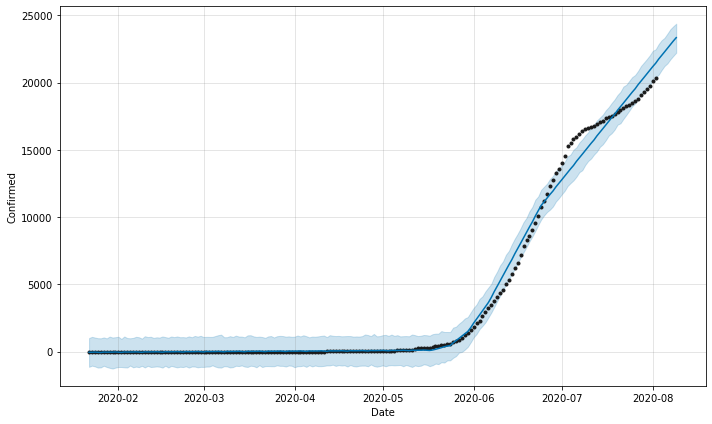

In [52]:
confirmed_forecast_plot = m.plot(forecast, xlabel = 'Date', ylabel='Confirmed')

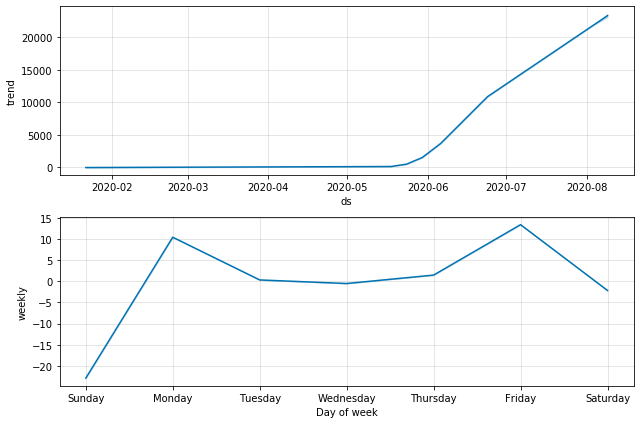

In [53]:
confirmed_forecast_plot = m.plot_components(forecast)

#For Death Cases

In [54]:
death.columns = ['ds','y']
death['ds'] = pd.to_datetime(death['ds'])

In [55]:
death.tail()

ds     y
189 2020-07-29  49.0
190 2020-07-30  52.0
191 2020-07-31  56.0
192 2020-08-01  56.0
193 2020-08-02  57.0

In [56]:
m = Prophet(interval_width=0.95)
m.fit(death)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
196 2020-08-05
197 2020-08-06
198 2020-08-07
199 2020-08-08
200 2020-08-09

In [57]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
196 2020-08-05  54.324177   52.432082   56.125784
197 2020-08-06  55.192726   53.291458   57.109029
198 2020-08-07  56.025571   54.218877   57.734889
199 2020-08-08  56.894131   55.166211   58.670677
200 2020-08-09  57.543015   55.631234   59.273814

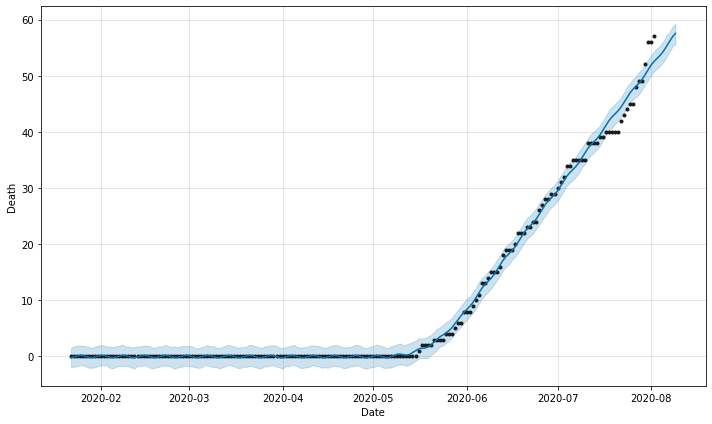

In [58]:
death_forecast_plot = m.plot(forecast,xlabel = 'Date', ylabel='Death')

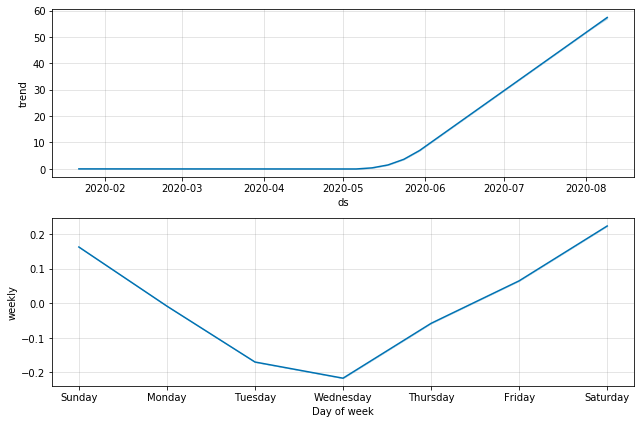

In [59]:
death_forecast_plot = m.plot_components(forecast)

#For Recovered Cases

In [60]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [61]:
recovered.tail()

ds        y
189 2020-07-29  14021.0
190 2020-07-30  14248.0
191 2020-07-31  14399.0
192 2020-08-01  14492.0
193 2020-08-02  14603.0

In [62]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
196 2020-08-05
197 2020-08-06
198 2020-08-07
199 2020-08-08
200 2020-08-09

In [63]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
196 2020-08-05  16897.020559  16283.218658  17517.195191
197 2020-08-06  17224.344926  16591.230263  17832.485390
198 2020-08-07  17544.692142  16919.545162  18176.084231
199 2020-08-08  17846.184038  17230.442809  18535.309006
200 2020-08-09  18134.889576  17487.513320  18801.705835

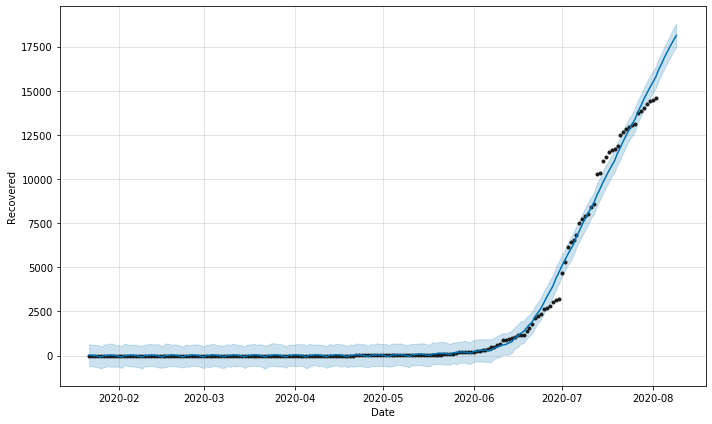

In [64]:
recovered_forecast_plot = m.plot(forecast,xlabel = 'Date', ylabel='Recovered')

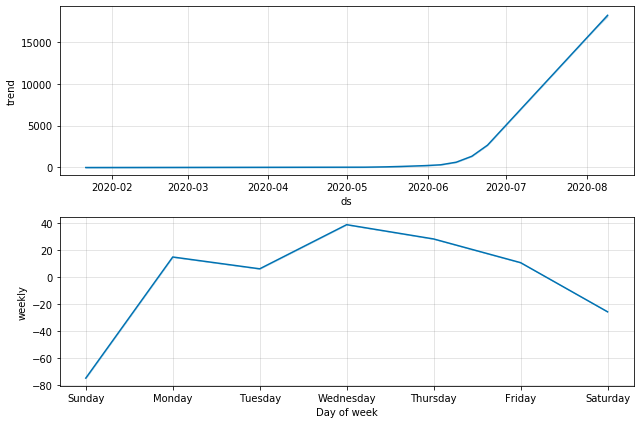

In [65]:
recovered_forecast_plot = m.plot_components(forecast)

#For Active Cases`

In [66]:
active.columns = ['ds','y']
active['ds'] = pd.to_datetime(active['ds'])

In [67]:
active.tail()

ds       y
189 2020-07-29  5203.0
190 2020-07-30  5247.0
191 2020-07-31  5316.0
192 2020-08-01  5538.0
193 2020-08-02  5672.0

In [68]:
m = Prophet(interval_width=0.95)
m.fit(active)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
196 2020-08-05
197 2020-08-06
198 2020-08-07
199 2020-08-08
200 2020-08-09

In [69]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds         yhat   yhat_lower    yhat_upper
196 2020-08-05  8413.240694  5568.947806  11186.081331
197 2020-08-06  8491.829820  5553.737463  11500.450565
198 2020-08-07  8582.757695  5653.324760  11343.883329
199 2020-08-08  8662.475952  5775.823789  11413.035674
200 2020-08-09  8756.529237  5917.552340  11604.844278

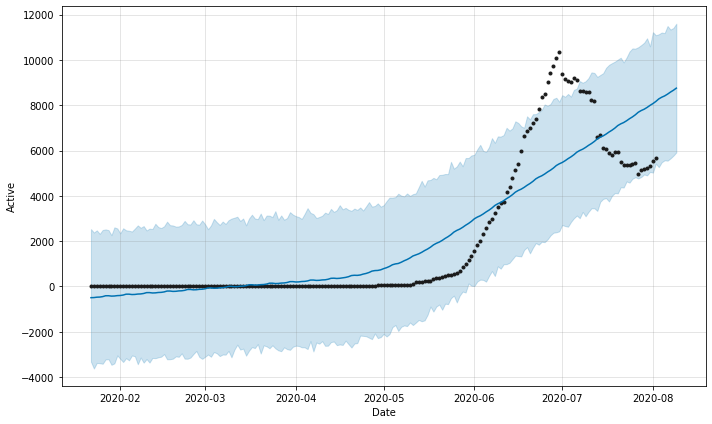

In [70]:
active_forecast_plot = m.plot(forecast, xlabel = 'Date', ylabel='Active') 

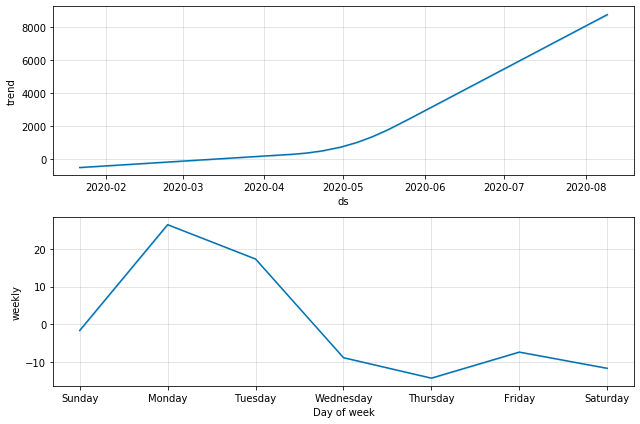

In [71]:
active_forecast_plot = m.plot_components(forecast)